In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(threshold=np.inf)
# schemes = ['ost_2', 'ost_3', 'ost_4', 'ost_5', 'ost_6']
# schemes = ['bppn_50', 'bppn_100', 'bppn_150', 'bppn_200', 'bppn_250']
# schemes = ['bppn_10', 'bppn_20', 'bppn_30', 'bppn_40', 'bppn_50']
schemes = ['mss_512', 'mss_1024', 'mss_2048']
# schemes = ['new_schedule','new_schedule2', 'new_schedule3', 'old_schedule']
schemes = ['new_schedule3/bppn_10', 'new_schedule3/bppn_20', 'new_schedule3/mss_512', 'new_schedule3/bppn_320', 'old_schedule/mss_512']
schemes = ['new_schedule3/mss_512']
schemes = ['new_schedule3/mss_512', 'new_schedule3/mss_2048_bppn_40', 'new_schedule3/mss_2048_bppn_80', 'new_schedule3/mss_2048_bppn_120', 'new_schedule3/mss_2048_bppn_160', 'new_schedule3/mss_2048_bppn_240', 'old_schedule/mss_512']
schemes = ['new_schedule2/mss_512', 'new_schedule2/mss_2048_bppn_40', 'new_schedule2/mss_2048_bppn_160', 'new_schedule2/mss_2048_bppn_400', 'new_schedule2/mss_2048_bppn_880', 'old_schedule/mss_512']
# schemes = ['new_schedule3/mss_512', 'new_schedule3/mss_2048_bppn_40', 'new_schedule3/mss_2048_bppn_80', 'new_schedule3/mss_2048_bppn_160', 'new_schedule3/mss_2048_bppn_320', 'new_schedule3/mss_2048_bppn_640', 'old_schedule/mss_512']
schemes = ['new_schedule2/mss_512', 'new_schedule2/mss_2048_bppn_40']
schemes = ['onepod/mss_512', 'onepod/mss_2048']
schemes = ['dctcp/multipods_W5/W5_incast', 'Zeropod/multipods_W5/W5_incast/ppt_16_bppn_2560']
schemes_label = schemes


workloads = ["W5_0.1", "W5_0.25", "W5_0.5", "W5_0.75", "W5_1"]
labels = ["10", "25", "50", "75", "100"]

# workloads = ["W4_0.1", "W4_0.25", "W4_0.5", "W4_0.75", "W4_1"]
# labels = ["10", "25", "50", "75", "100"]

# workloads = ["W5_0.1"]
# labels = ["10"]

metrics = ['FCT', 'GOODPUT']

# labels = ['10', '25', '50', '75', '100']
# labels = ['2', '3', '4', '5', '6']

my_figsize = [20, 10]
my_fontsize = 20
colors = ['darkblue', 'firebrick']
WIDTH = 0.03  # the width of the bars
SHORT = 110001  # 100KB
LONG = 1000000 # 1MB

data = {}
for scheme in schemes:
    data[scheme] = {}
    for workload in workloads:
        data[scheme][workload] = {}

for scheme in schemes:
    for workload in workloads:
        for metric in metrics:
            file_name = "../DATA/Zeropod/{scheme}/DATA_zeropod_{workload}/{metric}.txt".format(scheme=scheme, workload=workload, metric=metric)
            data[scheme][workload][metric] = np.loadtxt(file_name)

for scheme in schemes:
        for workload in workloads:
            data[scheme][workload]['SHORT_IDX'] = data[scheme][workload]['FCT'][:, 4] < SHORT
            data[scheme][workload]['LONG_IDX'] = data[scheme][workload]['FCT'][:, 4] > LONG
            data[scheme][workload]['MIDDLE_IDX'] = (data[scheme][workload]['FCT'][:, 4] >= SHORT) * (data[scheme][workload]['FCT'][:, 4] <= LONG)
            data[scheme][workload]['singlepod'] = np.trunc(data[scheme][workload]['FCT'][:,2] / 16) == np.trunc(data[scheme][workload]['FCT'][:,3] / 16)
            data[scheme][workload]['multipods'] = np.trunc(data[scheme][workload]['FCT'][:,2] / 16) != np.trunc(data[scheme][workload]['FCT'][:,3] / 16)


In [2]:
# def slowdown_flowsize():
#     for scheme in schemes:
#         for workload in workloads:
#             slowdown = 


len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88
len(flowsize_to_show): 88


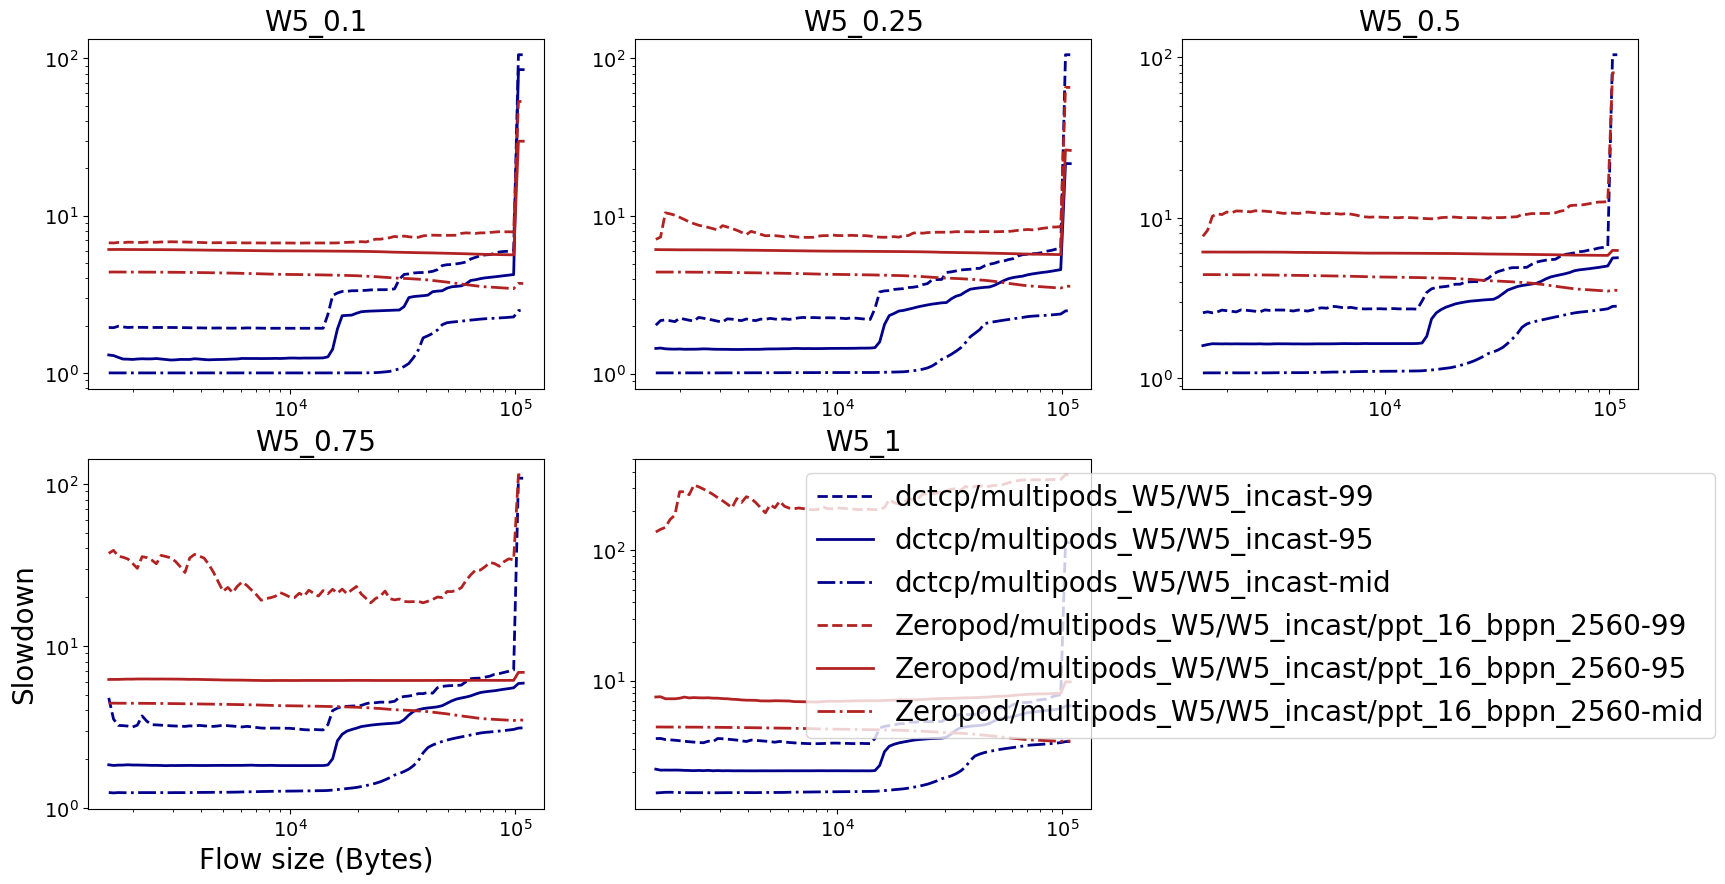

In [3]:
my_fontsize = 20
def get_slowdown_percentile(x, flowsize, slowdown, percent=99):
    index = np.searchsorted(flowsize, x, side='right') - 1
    if index < 0:
        return 0
    else:
        return np.percentile(slowdown[:index+1], percent)

def fct_bar_plot(mode, labels, workload, flow_range='all', pods="all"):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=my_figsize)
    for plot_index, workload in enumerate(workloads):
        ax = axs[int(plot_index/3), plot_index%3]
        for i, scheme in enumerate(schemes):
            if flow_range == 'Mice':
                idx = data[scheme][workload]['SHORT_IDX']
            elif flow_range == 'Elephant':
                idx = data[scheme][workload]['LONG_IDX']
            elif flow_range == 'middle':
                idx = data[scheme][workload]['MIDDLE_IDX']
            elif flow_range == 'all':
                idx = np.arange(len(data[scheme][workload]['FCT']))

            # available_idx = data[scheme][workload]['FCT'][:, 7] > 0 # 过滤未完成的流
            if pods == "singlepod":
                idx_xx = data[scheme][workload]['singlepod']
                idx = idx * idx_xx
            elif pods == "multipods":
                idx_xx = data[scheme][workload]['multipods']
                idx = idx * idx_xx
            # print(sum(idx_xx))
            # idx_xx = data[scheme][workload]['singlepod']
            
            # print(sum(idx))
            
            fct_data = data[scheme][workload]['FCT'][idx, :]
            fct_data = np.array(sorted(fct_data, key=lambda x:x[4]))
            flowsize = fct_data[:, 4] # flowsize
            slowdown = fct_data[:, 5] # slowdown
            # print(slowdown)
        
            
            
            
            flowsize_to_show = []
            min_flowsize = flowsize.min()
            step = 1.05
            now_flowsize = min_flowsize * step
            while now_flowsize < flowsize.max():
                flowsize_to_show.append(now_flowsize)
                now_flowsize = now_flowsize * step
            print("len(flowsize_to_show): "+ str(len(flowsize_to_show)))
            # print(get_slowdown_percentile(100000, flowsize, slowdown))
            percentiles_99 = [get_slowdown_percentile(x, flowsize, slowdown, 99.9) for x in flowsize_to_show]
            percentiles_95 = [get_slowdown_percentile(x, flowsize, slowdown, 95) for x in flowsize_to_show]
            percentiles_50 = [get_slowdown_percentile(x, flowsize, slowdown, 50) for x in flowsize_to_show]
            
            # print(flowsize)
            ax.plot(flowsize_to_show, percentiles_99, color=colors[i], label=schemes_label[i] + '-99', linestyle = '--', linewidth=2)
            ax.plot(flowsize_to_show, percentiles_95, color=colors[i], label=schemes_label[i] + '-95', linestyle = 'solid',linewidth=2)
            ax.plot(flowsize_to_show, percentiles_50, color=colors[i], label=schemes_label[i] + '-mid', linestyle = '-.',linewidth=2)
        
        # ax.set_xticks(fontsize=my_fontsize)
        # ax.set_yticks(fontsize=my_fontsize)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xscale('log')    
        ax.set_yscale('log')
        # ax.set_xlim(10**3, 10**6)
        if plot_index == 3:
            ax.set_xlabel("Flow size (Bytes)", fontsize=my_fontsize)
            ax.set_ylabel("Slowdown", fontsize = my_fontsize)
        ax.set_title(workload, fontsize=my_fontsize)
        if plot_index == 4:
            ax.legend(ncol=1, loc="upper right", bbox_to_anchor=(2.4, 1), fontsize=20)
    axs[1,2].axis('off')
    

# fct_bar_plot("99p", labels, workloads, flow_range='Mice', pods='multipods')
fct_bar_plot("99p", labels, workloads, flow_range='Mice', pods='all')

In [4]:
arr = np.array([[3,2], [2,5], [4, 11], [1, 3]])
print(arr)
print(arr[:, 0])
print(arr[:, 0:1])


[[ 3  2]
 [ 2  5]
 [ 4 11]
 [ 1  3]]
[3 2 4 1]
[[3]
 [2]
 [4]
 [1]]
